# Parameters

In [2]:
RUN = 160 
SUBRUN = 0
Nevents = 50 # number of events we are going to extract to plot

root = "/home/juan/projects/lst_camera_validation/plot_on_camera/data/20240416"

path = root + "/LST-4.1.Run"+str(RUN).zfill(5)+"."+str(SUBRUN).zfill(4)+".fits.fz"

Packages and imports

In [56]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy             as np
from protozfits import File
from traitlets.config      import Config
from ctapipe.io            import EventSource
from ctapipe.visualization import CameraDisplay
from ctapipe.coordinates   import EngineeringCameraFrame

import graphs
indexes = graphs.INDEX_ORDER_PX

import auxiliar as aux
aux.parameters()

In [54]:
file = File(path)

events = []
for i in range(Nevents):
    events.append(file.Events[i])

ws = []
for ev in events:
    tot_ws = ev.waveform

    _array_array = []
    for i in range(1855):
        _array = []
        for j in range(40):
            _array.append(tot_ws[i * 40 + j])
        _array_array.append(_array)
    
    ws.append(np.array(_array_array))

pedestals = []
for w in ws:
    _p = []
    for _w in w:
        _p.append(np.mean(_w))
    pedestals.append(np.array(sort_based(_p, indexes)))

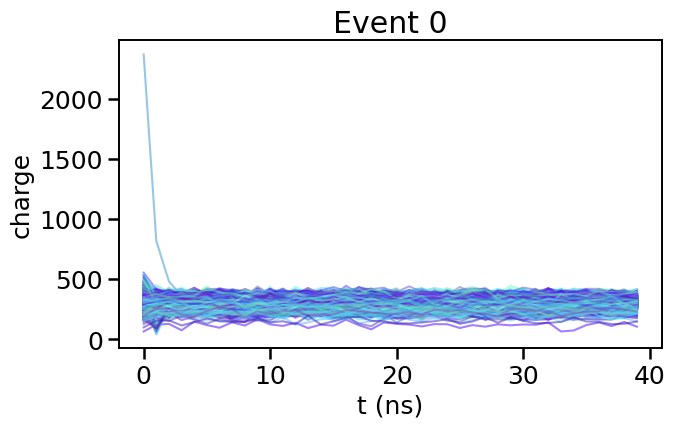

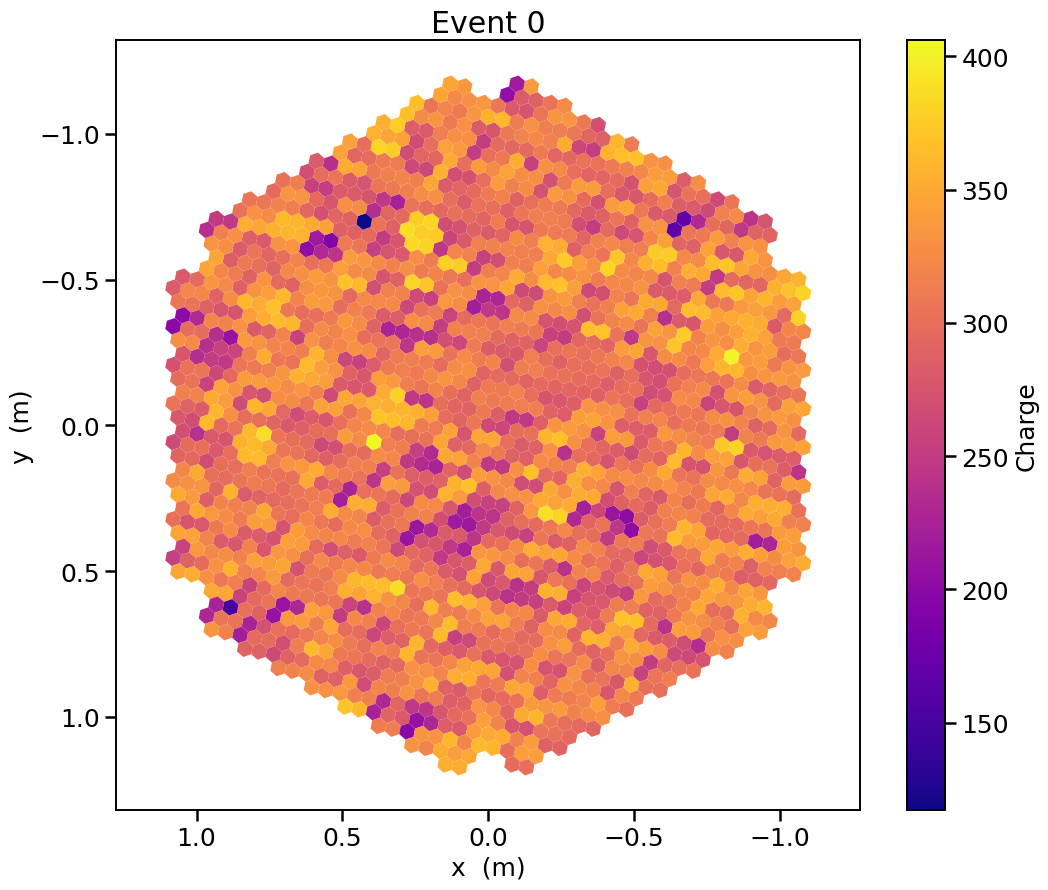

In [ ]:
for event_index in range(len(ws)):
    
    aux.event_waveforms_plot(event_index, ws)
    plt.title(f"Event {event_index}")
    plt.show()

    event_pedestals_plot(event_index, pedestals, camgeom)
    plt.show()

In [57]:
def event_pedestals_plot(event_index, pedestals,camgeom):
    
    event_index = event_index-1
    
    fig,ax = plt.subplots(figsize=(12,10))       

    camdisplay =CameraDisplay(camgeom.transform_to(EngineeringCameraFrame()),ax=ax,
                                image=pedestals[event_index],show_frame=False,cmap='plasma',
                              title='Event '+str(event_index+1))
    camdisplay.add_colorbar(label='Charge',ax=ax)


    ax.invert_yaxis()
    ax.invert_xaxis()

def sort_based(x_array, ref_array):

    return np.array([x for ref, x in sorted(zip(ref_array, x_array))])

In [34]:
source  = EventSource(input_url=path, max_events=1)
camgeom = source.subarray.tel[1].camera.geometry


# Plot multiple events

In [ ]:
######################################

# create an array with all the event numbers we want to plot 
# (note: there are not eventID = 0, so start from 1)
event_indexes = np.array(range(10)) + 1

######################################

for ev in event_indexes:
    event_pedestals_plot(ev, pedestals, camgeom)
    plt.show()